In [1]:
# MONKEYTYPE ANALYSIS

# The first step is to load data from the website. Fortunately, MonkeyType has a built in functionality allowing us to download CSV data of our past typing tests. Here I load the csv

In [2]:
import config
import pandas as pd

In [3]:
data = pd.read_csv(config.CSV_INPUT_FILEPATH())


In [4]:
# The first graph below is the raw wpm/index graph

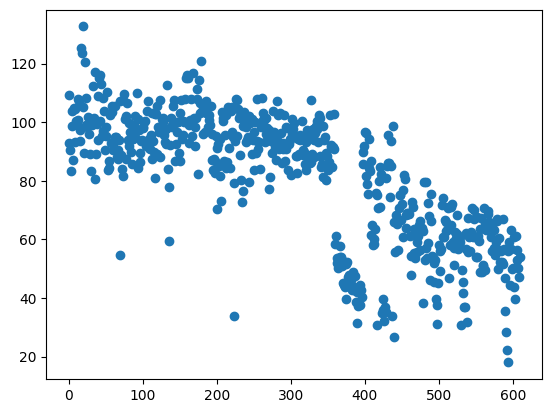

count    610.000000
mean       0.237705
std        3.191875
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       77.000000
Name: afkDuration, dtype: float64


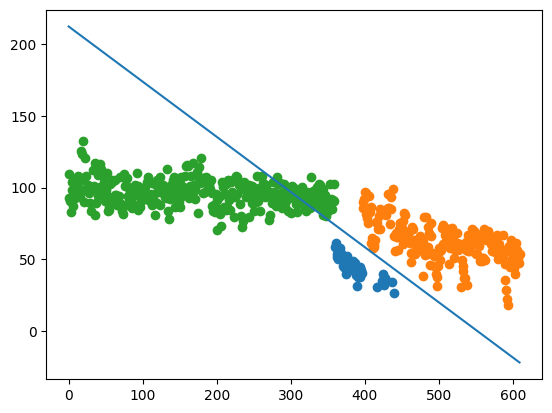

In [5]:
from eda import *
data_out = filt(data,plot=True)

In [6]:
data_out.describe()

,wpm,acc,rawWpm,consistency,quoteLength,restartCount,testDuration,afkDuration,incompleteTestSeconds,tags,timestamp,ind
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,0.0,6.070000e+02,607.000000
mean,80.966211,94.406573,82.811384,69.201021,-0.904448,3.741351,34.013163,0.217463,15.944415,NaN,1.703869e+12,305.298188
std,21.802890,3.933317,21.707626,9.989153,0.315857,14.595898,28.147866,3.168871,61.036057,NaN,2.096312e+10,176.248236
min,17.990000,76.410000,17.990000,6.540000,-1.000000,0.000000,2.890000,0.000000,0.000000,NaN,1.670424e+12,0.000000
25%,62.220000,92.375000,65.310000,63.850000,-1.000000,0.000000,30.000000,0.000000,0.000000,NaN,1.670856e+12,153.500000
50%,87.600000,95.030000,89.600000,70.470000,-1.000000,1.000000,30.000000,0.000000,2.220000,NaN,1.716946e+12,306.000000
75%,98.380000,97.030000,99.595000,76.400000,-1.000000,3.000000,30.010000,0.000000,15.490000,NaN,1.717781e+12,457.500000
max,132.670000,100.000000,132.670000,88.650000,1.000000,298.000000,246.750000,77.000000,1220.910000,NaN,1.720735e+12,609.000000


In [7]:
data_out.columns

Index(['_id', 'isPb', 'wpm', 'acc', 'rawWpm', 'consistency', 'charStats',
       'mode', 'mode2', 'quoteLength', 'restartCount', 'testDuration',
       'afkDuration', 'incompleteTestSeconds', 'punctuation', 'numbers',
       'language', 'funbox', 'difficulty', 'lazyMode', 'blindMode',
       'bailedOut', 'tags', 'timestamp', 'missed', 'extra', 'incorrect', 'ind',
       'dataGroup'],
      dtype='object')

In [8]:
# Now that the data is loaded and categorized, we can begin the analysis
# The goal of this analysis is to determine if your typing speed will improve better if you go at top speed, making some mistakes, or go slightly slower to improve accuraccy

# General consensus is that slowing down to improve accuracy is the best way to improve speed, but I would like to see the statistical level of this improvement. 

# Another thing I would like to measure is the effect on long-term improvement of re-doing tests. Monkeytype has a feature where you can elect at any point during the test to re-try with new text with a simple shortcut <tab><enter>
# I anticipate that using this will have a negative effect on long-term typing speed but I would like to see the data on this

# To do this, we will be looking at the most recent and consistent data.

In [9]:
data = data_out.where((data_out.dataGroup == "new") & (data_out.afkDuration == 0) & (data_out.quoteLength == -1))

In [10]:
data.columns

Index(['_id', 'isPb', 'wpm', 'acc', 'rawWpm', 'consistency', 'charStats',
       'mode', 'mode2', 'quoteLength', 'restartCount', 'testDuration',
       'afkDuration', 'incompleteTestSeconds', 'punctuation', 'numbers',
       'language', 'funbox', 'difficulty', 'lazyMode', 'blindMode',
       'bailedOut', 'tags', 'timestamp', 'missed', 'extra', 'incorrect', 'ind',
       'dataGroup'],
      dtype='object')

In [11]:
data.describe()

,wpm,acc,rawWpm,consistency,quoteLength,restartCount,testDuration,afkDuration,incompleteTestSeconds,tags,timestamp,ind
count,301.000000,301.000000,301.000000,301.000000,301.0,301.000000,301.000000,301.0,301.000000,0.0,3.010000e+02,301.000000
mean,95.754817,95.519967,97.762458,74.615415,-1.0,3.707641,28.351262,0.0,16.685914,NaN,1.717956e+12,205.873754
std,8.112945,2.559102,8.140052,5.264251,0.0,5.909956,5.112576,0.0,31.652084,NaN,1.477703e+09,88.783467
min,72.790000,76.410000,72.790000,55.590000,-1.0,0.000000,15.000000,0.0,0.000000,NaN,1.715354e+12,50.000000
25%,90.390000,94.240000,92.400000,71.010000,-1.0,0.000000,30.000000,0.0,0.000000,NaN,1.716997e+12,129.000000
50%,95.580000,95.970000,97.980000,74.750000,-1.0,2.000000,30.000000,0.0,5.900000,NaN,1.717159e+12,206.000000
75%,101.580000,97.130000,103.170000,78.700000,-1.0,5.000000,30.000000,0.0,19.990000,NaN,1.719841e+12,282.000000
max,120.790000,100.000000,123.170000,86.740000,-1.0,61.000000,58.040000,0.0,364.340000,NaN,1.720445e+12,359.000000


In [12]:
data.dataGroup.describe()

count     301
unique      1
top       new
freq      301
Name: dataGroup, dtype: object

In [13]:
# Now we check out some features and do some eda

In [14]:
import seaborn as sns
data = data[["wpm","rawWpm","acc","consistency","restartCount","ind"]]

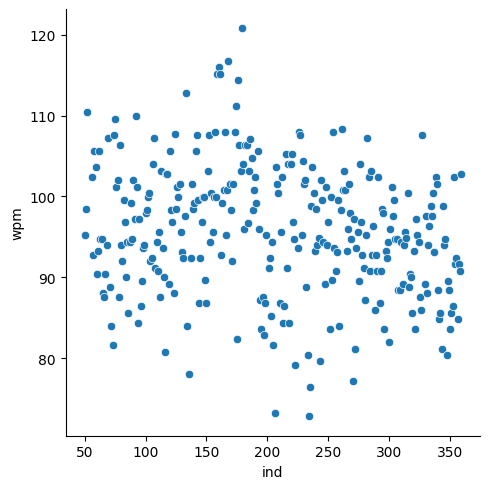

In [15]:
sns.relplot(data=data,x="ind",y="wpm")

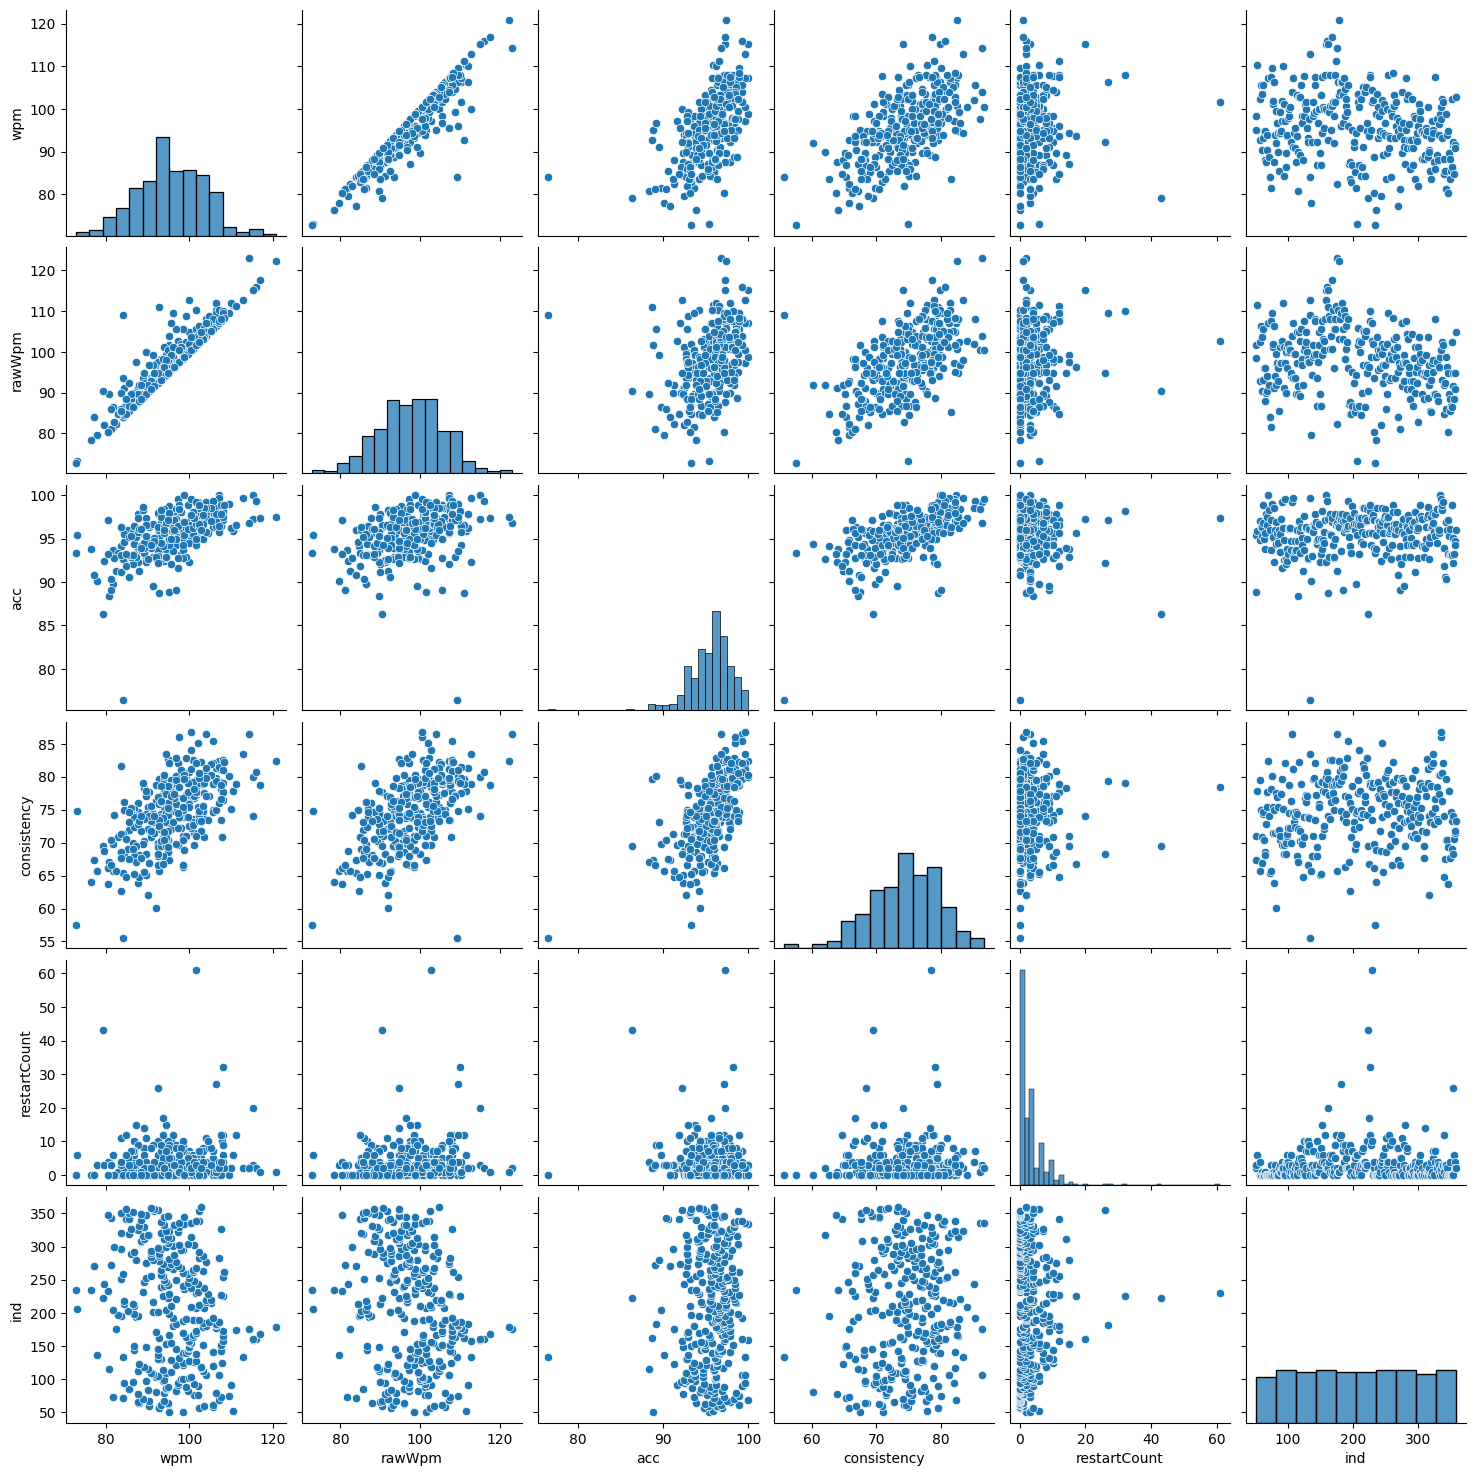

In [16]:
sns.pairplot(data)

<Axes: xlabel='wpm', ylabel='acc'>

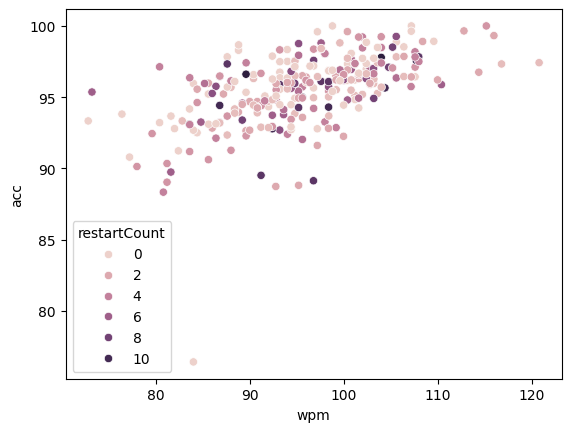

In [17]:
sns.scatterplot(x= data["wpm"], y=data["acc"], hue=data["restartCount"].where(data["restartCount"]<12))

<Axes: xlabel='restartCount', ylabel='wpm'>

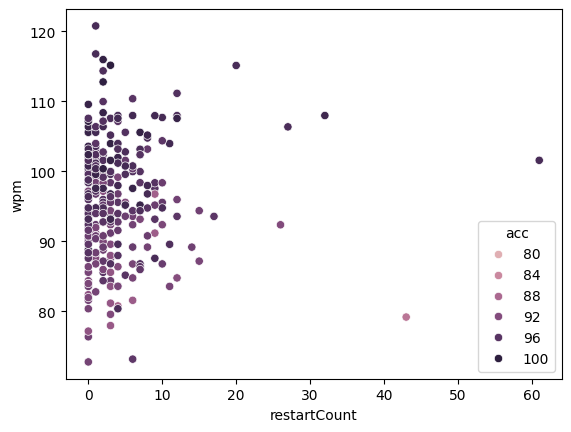

In [18]:
sns.scatterplot(x= data["restartCount"], y=data["wpm"], hue = data["acc"])

<Axes: xlabel='wpm', ylabel='consistency'>

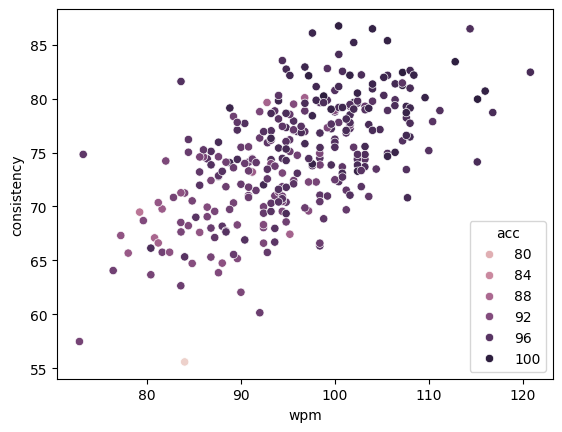

In [19]:
sns.scatterplot(x= data["wpm"], y=data["consistency"], hue = data["acc"])

<Axes: xlabel='wpm', ylabel='consistency'>

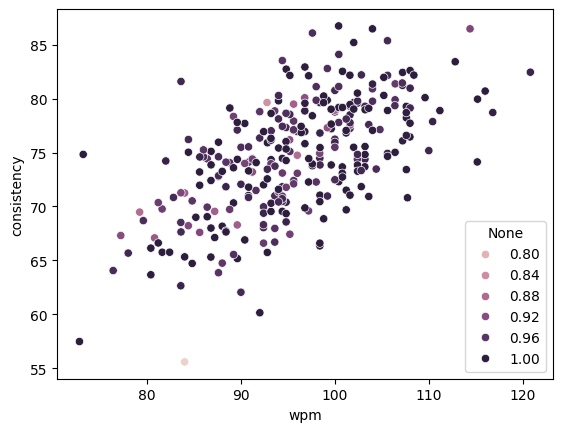

In [20]:
sns.scatterplot(x= data["wpm"], y=data["consistency"], hue = (data["wpm"]/data["rawWpm"]))

In [21]:
# We can see some very distincive trends (or lack thereof) in this data just from the eda. For example, 
# higher wpm is correlated with higher accuracy (thus confirming our hypothesis), and suprisingly, 
# the number of resets does not seem to affect either accuracy in any significant way. 
# Now our next task is to quantify the correlation between high wpm and high accuracy using linear regressio

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
wpmaccModel = LinearRegression()

In [24]:
lin_reg_data = data[~data["wpm"].isna()].copy()
print(data.wpm)

397       NaN
398       NaN
399       NaN
400       NaN
401       NaN
        ...  
355     92.38
356     84.79
357     91.58
358     90.80
359    102.78
Name: wpm, Length: 607, dtype: float64


In [25]:
wpmaccModel.fit(lin_reg_data[["acc"]],lin_reg_data[["wpm"]])

LinearRegression()

In [26]:
lin_reg_data["pred_wpm"] = wpmaccModel.predict(lin_reg_data[["acc"]])

In [27]:
coef, intercept = wpmaccModel.coef_[0][0],wpmaccModel.intercept_[0]

In [28]:
coef, intercept

(1.831961910931971, -79.2341235939524)

In [29]:
# with a coeficcient of 1.8, we can see that for every 1% accuracy increase, 
# there is a predicted increase of ~2 words per minute. 